# 04 Scipy 

**For a better understanding of this notebook, the 03 Scipy notebook should be known.**   
This script will go beyond descriptive statistics as shown in the previous notebook. One main purpose is the filling of gaps in data set. First, by applying some easy (and not so easy) interpolation algorithms. Second, by setting up a linear regression to another data set and use other data to fill the gap (which will be done as a project). Lastly, finding derivatives and antiderivatives will be introduced.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Interpolation

### 1D interpolation

The Scipy module offers the interpolate submodule, that can be used for interpolation. Procedural functions are offered along with high level interpolator classes, that offer moethods beyond simple gap filling. From simple linear interpolations to piecewise cubic splines most common interpolation algorithms can be found. In order to illustrate the algorithm itself, the interpolation will be performed on generated data.

In [2]:
from scipy.interpolate import interp1d

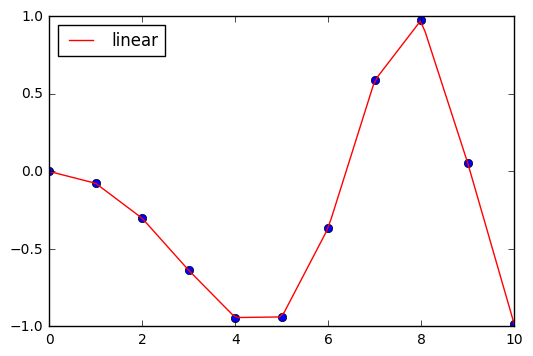

In [3]:
# generate an example data set
x = np.linspace(0, 10, num=11)
y = np.sin(-x**2/13.)


# interpolate
f = interp1d(x,y, kind='linear')
xi = np.linspace(0, 10, num=100)

# plot
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'ob')
ax.plot(xi, f(xi), '-r', label='linear')
plt.legend(loc='upper left')

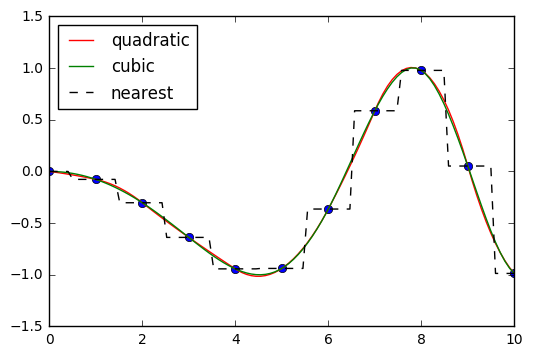

In [4]:
fq = interp1d(x,y,kind='quadratic')
fc = interp1d(x,y,kind='cubic')
fn = interp1d(x,y,kind='nearest')

# plot
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'ob')
ax.plot(xi, fq(xi), '-r', label='quadratic')
ax.plot(xi, fc(xi), '-g', label='cubic')
ax.plot(xi, fn(xi), '--k', label='nearest')
plt.legend(loc='upper left')

In terms of  filling gaps in environmental data, the univariate linear, quadratic and cubic functions, along with the nearest neighbour interpolator shall fit most requirements. Although it might not seem to be very useful in the given example, the nearest neighbour algorithm is especially usefull in case the set of observations shall be preserved and no new values shall be added. This is almost always the case for classified data.   
The cubic and quadratic interpolations are in fact spline interpolators. The interp1d can also apply higher splines by giving the order instead of the method as the *kind* argument.

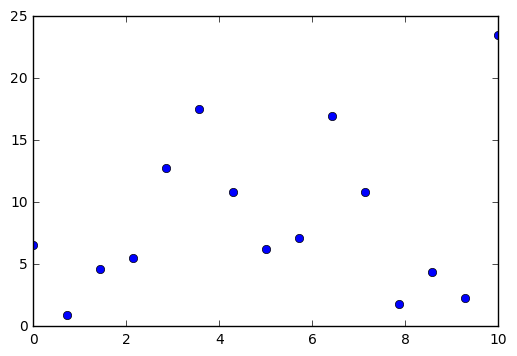

In [5]:
x = np.linspace(0,10, num=15)
np.random.seed(938)
y = np.random.gamma(1.5, 7, size=15)

# plot
fig, ax = plt.subplots(1,1)
ax.plot(x,y, 'ob')

In [6]:
xi = np.linspace(0,10, num=100)

# plot
fig, axes = plt.subplots(3,3, figsize=(12,12))

for i in range(9):
    f = interp1d(x,y,kind=i + 1)
    axes.flatten()[i].plot(x,y,'ob')
    axes.flatten()[i].plot(xi, f(xi), '-g')
    axes.flatten()[i].set_title('%d splines' % (i + 1))

### Linear Regression

In contrast to the interpolation algorithms a linear regression will find the best suitable parameter set to fit a predefined function to the set of data. In most implementations the *best* fit will be evaluated on the basis of either the *least squre method* or a *maximum likelihood* approach. This should not be confused with an interpolation, where **unknown** values are tried to be guessed based on the known values.

A short example shall illustrate this. We will use the scipy module to fint different function to the observations from above, then the difference shall be clear. The first example is a linear model, then a polynomial expression.

In [7]:
from scipy.optimize import curve_fit

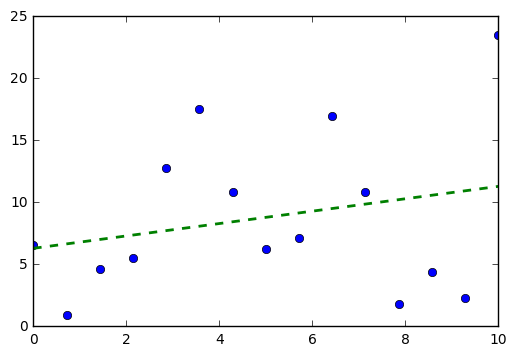

In [8]:
# define the linear model
lin = lambda x,m,b: m*x + b

# fit
cof, cov = curve_fit(lin,x,y)

# plot
fig, ax = plt.subplots(1,1)

ax.plot(x,y, 'ob')
ax.plot(xi,[lin(_, *cof) for _ in xi], '--g', lw=2)

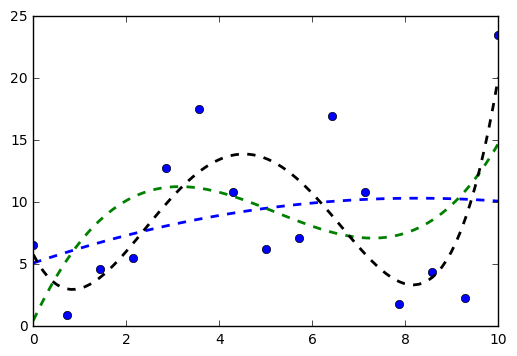

In [9]:
# prepare the functions
poly2 = lambda x,a,b,c: a*x**2 + b*x + c
poly3 = lambda x,a,b,c,d: a*x**3 + b*x**2 + c*x + d
poly4 = lambda x,a,b,c,d,e: a*x**4 + b*x**3 + c*x**2 + d*x + e

# plot
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'ob')

for model, c in zip((poly2, poly3, poly4), ('b', 'g', 'k')):
    cof, cov = curve_fit(model, x, y)
    ax.plot(xi, [model(_, *cof) for _ in xi], '--%s' % c, lw=2)

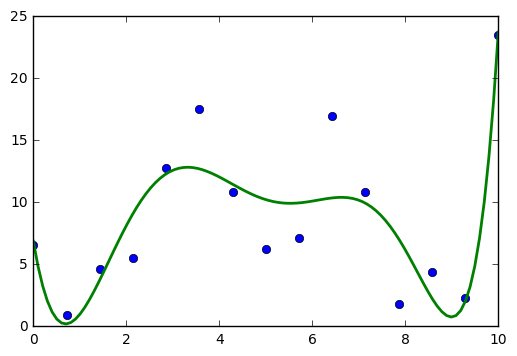

In [10]:
# poly 7
poly7 = lambda x,a,b,c,d,e,f,g,h: a*x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h

# fit
cof, cov = curve_fit(poly7, x, y)

# plot
fig, ax = plt.subplots(1,1)

ax.plot(x,y,'ob')
ax.plot(xi, [poly7(_, *cof) for _ in xi], '-g', lw=2)

### 2D interpolation

The Scipy stack includes a number of approaches, functions and classes which are intended for multivariate interpolation, with an even stronger subset for 2D interpolation. Most of these classes need an in-depth understanding of the math behind the algorithm in order to avoid misuage and errors. These kinds of algorithms and approaches go beyond the scope of this notebook and will not be introduced. However, the usage of the respective classes and functions is very similar to the ones introduced here.   
Therefore, let's generate a continous field.

In [11]:
# define a field
rf = lambda x, y: np.sin(x) + np.sin(y)

At first, we need a regular aranged grid, where we can apply the field to. This grid will represent the *truth* of our observation. In an application of these techniques, this field is what we are actually interested in. This example will illustrate how near we can come using the interpolators for this very easy approach of an mathematical describeable field.

<a list of 15 text.Text objects>

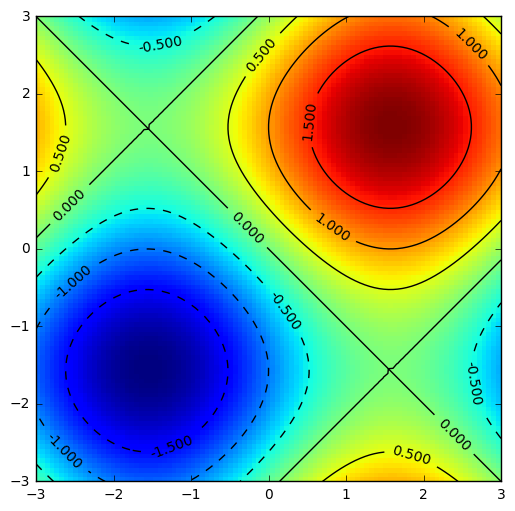

In [12]:
# generate a meshgrid with range()
t = np.linspace(-3, 3, 100)
xx,yy = np.meshgrid(t,t)
#xx, yy = np.mgrid[-3:3:100j, -3:3:100j]
zz = rf(xx,yy)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pcolor(xx,yy,zz)

# add contour lines
contour = ax.contour(xx,yy,zz, colors='k')
ax.clabel(contour)

Next, we will randomly select some samples from this environment and check, how different interpolations perform here.

In [13]:
# select sample points
n = 30
sample = np.random.rand(n,2) * 6 - 3

# unstack
xi = sample[:, 0]
yi = sample[:, 1]
zi = rf(xi, yi)

Similar to the interp1d, the scipy package offers an interp2d algorithm, which in fact does not interpolate but approximate. The actual interpolation algorithm is called *griddata*, which can be used. It has to be mentioned, that this is an blackbox function, that just takes the input data.

In [14]:
from scipy.interpolate import griddata, SmoothBivariateSpline, Rbf

/home/mirko/anaconda3/envs/py3-dev/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


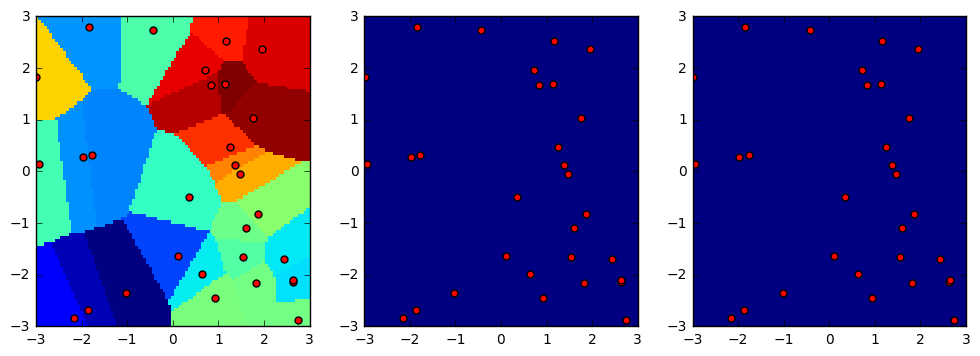

In [15]:
# interpolate using the nearest neighbors
Zn = griddata(sample, zi, (xx,yy), method='nearest')
Zl = griddata(sample, zi, (xx,yy), method='linear')
Zc = griddata(sample, zi, (xx,yy), method='cubic')

fig, axes = plt.subplots(1,3, figsize=(12,4))

for ax, Z in zip(axes, (Zn, Zl, Zc)):
    # plot
    ax.pcolor(xx,yy,Z)
    ax.scatter(xi, yi,25,(1,0,0))
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)

In [16]:
griddata(sample, zi, (xx,yy), method='nearest')

array([[-1.13391809, -1.13391809, -1.13391809, ...,  0.12989957,
         0.12989957,  0.12989957],
       [-1.13391809, -1.13391809, -1.13391809, ...,  0.12989957,
         0.12989957,  0.12989957],
       [-1.13391809, -1.13391809, -1.13391809, ...,  0.12989957,
         0.12989957,  0.12989957],
       ..., 
       [ 0.81530046,  0.81530046, -0.62004579, ...,  1.62501462,
         1.62501462,  1.62501462],
       [ 0.81530046, -0.62004579, -0.62004579, ...,  1.62501462,
         1.62501462,  1.62501462],
       [ 0.81530046, -0.62004579, -0.62004579, ...,  1.62501462,
         1.62501462,  1.62501462]])

As a last interpolation example, one of the classes is used: SmoothBivariareSpline. This class is quite handy as the order of splines can be set for each variable independently, e.g. you might use cubic splines in x-direction but a linear interpolation on the y-axis.

(-3, 3)

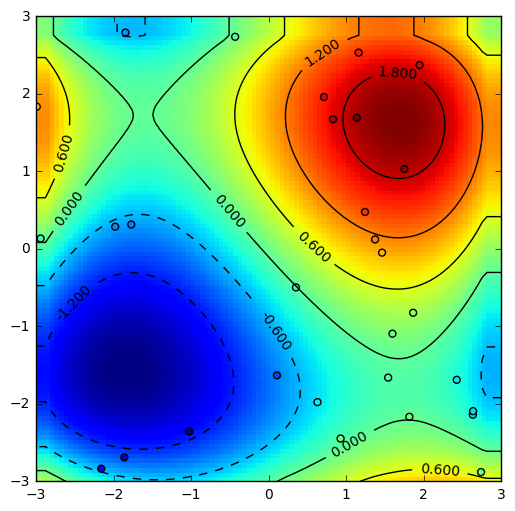

In [17]:
# use a spline of order 3
interpolant = SmoothBivariateSpline(xi, yi, zi, kx=3, ky=3)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.pcolor(xx,yy,interpolant(t, t))

# add contour lines
contour = ax.contour(xx,yy, interpolant(t, t), colors='k')
ax.clabel(contour)

# add the sample
ax.scatter(xi, yi, 25, zi)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3, 3)

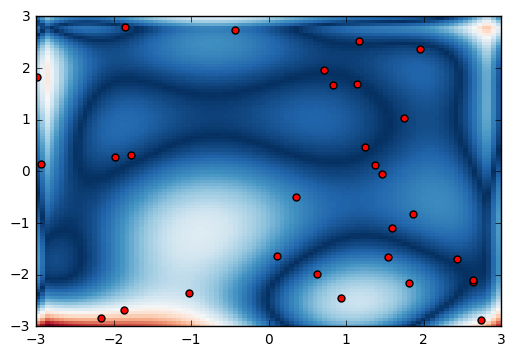

In [18]:
# calculate the residuals
residuals = np.abs(zz - interpolant(t,t))

fig, ax = plt.subplots(1,1)
ax.pcolor(xx,yy,residuals, cmap='RdBu_r')
ax.scatter(xi, yi, 25, (1,0,0))
plt.xlim(-3, 3)
plt.ylim(-3, 3)

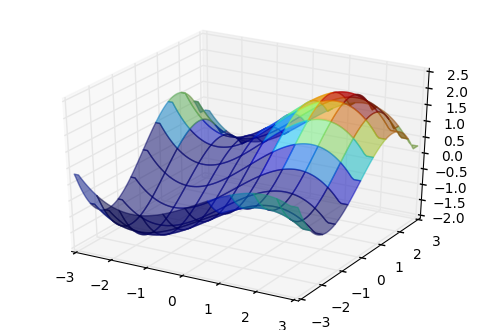

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# calc the colormap
cmap = cm.jet(interpolant(t,t) / np.amax(interpolant(t,t)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,interpolant(t,t), alpha=0.5, facecolors=cmap)

### Integration 

Integration is a common tool is several environmental models and can be used to evaluate the integrative information of a function, especially in non-linear cases. In principle, scipy offer different approaches for solving an integration problem, numerical integration and symbolic integration. 

  * **numerical integration:** these algorithms will find a numerical approximation of the integral. This is kind of *always working*,but these are apprximations and will introduce an error to the result. This error might or might not be significant.
  * **symbolic integration:** by symbolic integration scipy will try to solve the integral analytically. Obviously this will only work if there is an analytical solution for the problem and a solver implemented. If available, this is the most correct solution as no approximations are used.
  * **class specific integration:** some of scipy's interpolation classes also implement methods for finding derivatives and integrals. These methods are very specific and therefore are usually the best choice.

#### polynomial integration

For polynomials, the numpy packages offers a really fast and exact solver based on the <a href="https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus" target='_blank'>Fundamental Theorem of Calculus</a>. This is a method of the polynomial object. Let's solve an rather easy example:
$$ f(x) = -x^2 + 5 $$

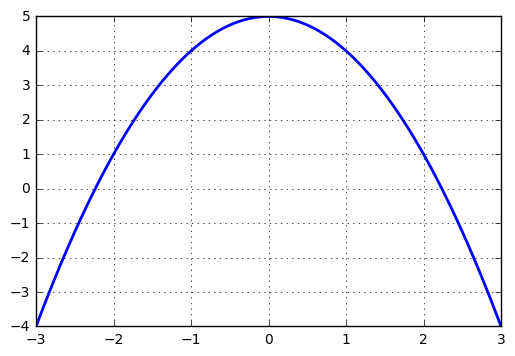

In [20]:
# create the polynom
p = np.poly1d([-1, 0, 5])
#p = np.poly1d([2])

# plot
x = np.linspace(-3,3, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, p(x), '-b', lw=2)
plt.grid()

In [21]:
# get the integral coefficent
print(p.integ())

         3
-0.3333 x + 5 x


7.3333333333333339

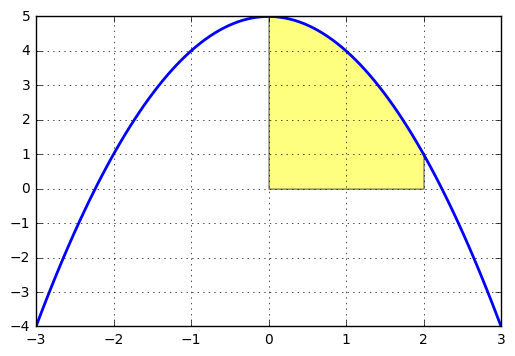

In [22]:
# get the integral on [0,2]
_x = np.linspace(0, 2, 100)

# plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, p(x), '-b', lw=2)
ax.fill_between(_x, 0, p(_x), facecolor='yellow', alpha=0.5)
plt.grid()

p.integ()(2)

#### sympy

**sympy** is an important package for **sym**bolic **py**thon, that can solve a lot of problems related to symbolic mathematics. One application is solving symbolic integration problems. One of the main advantages (like with the polnomial's integ method) is the set up of antiderivative. Unlike the polynomial class from numpy, the sympy functions can also be used to solve non-polynomial functions. Let's illustrate this on two easy examples.

$$f(x) = -x^2 + 5$$

$$f(x) = sin\left(\frac{-x^2}{13}\right)$$

In [23]:
from sympy import init_session,latex,pprint, integrate, symbols, sin as Sin
init_session(quiet=True)

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)


In order to make a variable *symbolic* and therefore for sympy useable, these variables have to be instantiated as *Symbol* class instances. The *symbols* class factory can be used for this.   
The integrate method can then return the antiderivative and, if a interval is given, the definite solution of the antiderivative on this integral.

In [24]:
# make z a symbol
z = symbols('z', real=True)

#print the antiderivate
print('Antiderivative:')
pprint(integrate(-z**2 + 5))

# solve for [0:3]
print('Solution [0,3):', integrate(-z**2 + 5, (z, 0,3)))

Antiderivative:
   3      
  z       
- ── + 5⋅z
  3       
Solution [0,3): 6


In [25]:
integrate(-z**2 + 5)

   3      
  z       
- ── + 5⋅z
  3       

Antiderivative:


                             ⎛0.392232270276368⋅z⎞        
-1.91213231759729⋅√π⋅fresnels⎜───────────────────⎟⋅Γ(3/4) 
                             ⎝         √π        ⎠        
──────────────────────────────────────────────────────────
                          Γ(7/4)                          


Solution [-5,5): -3.82426463519459*sqrt(pi)*fresnels(1.96116135138184/sqrt(pi))*gamma(3/4)/gamma(7/4)


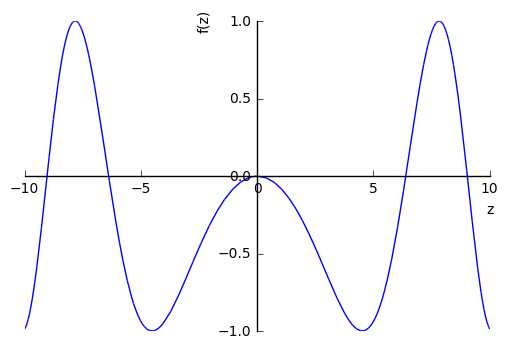

In [26]:
from sympy.plotting import plot as sym_plot
# make z2 an symbol
z = symbols('z', real=True)

# print the antiderivative
print('Antiderivative:')
pprint(integrate(-Sin(z**2 / 13.)))

sym_plot(-Sin(z**2 / 13.))

# solve for [-5,5]
print('Solution [-5,5):', integrate(-Sin(z**2 / 13.), (z, -5, 5)))

In [27]:
integrate(-Sin(z**2 / 13.))

                             ⎛0.392232270276368⋅z⎞        
-1.91213231759729⋅√π⋅fresnels⎜───────────────────⎟⋅Γ(3/4) 
                             ⎝         √π        ⎠        
──────────────────────────────────────────────────────────
                          Γ(7/4)                          

#### numerical integration

Any type of numerical solution for an integration problem is solved by finding an approximation. Obviously there are tons of solutions with different advantages and disadvantages. Some approximations are fast, others are almost impossible to solve within a reasonable time span.   
The scipy.interpolate package has two implementations that will fit almost all requirements of environmental scientist when it comes to integration. The function *cumtrapz* is an implementation of the <a href="https://en.wikipedia.org/wiki/Trapezoidal_rule" target='_blank'>trapezodial rule</a> and the *simp* function, which is an implementation of the <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule" target='_blank'>Simpson's rule</a>.

In [28]:
from scipy.integrate import cumtrapz, simps

In [29]:
# setup the function
f = lambda x : -np.sin(-x**2 / 13.)
x = np.linspace(-5,5, num=100)

print('trazezodial:\t', cumtrapz(f(x), x)[-1])
print('Simpson\'s:\t', simps(f(x), x))

trazezodial:	 4.90337498374
Simpson's:	 4.90377460764


In [30]:
# performance
f = lambda x : x**3 + x**2
z = symbols('z', real=True)

%timeit integrate(z**3+z**2, (z, -5, 5))
%timeit cumtrapz(f(x), x)
%timeit simps(f(x), x)

The slowest run took 22.09 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 687 µs per loop


10000 loops, best of 3: 25.3 µs per loop


10000 loops, best of 3: 99 µs per loop


##### Test scenario for integration precision using polynomials

$$ p(x) = 5*x^5 + x^4 + 3*x^3 + \frac{1}{3}*x^2 - \frac{3}{4}*x + 6$$

In [31]:
fp = lambda x: 5*x**5 + x**4 + 3*x**3 + (1/3) *x**2 - (3/4)*x + 6
nodes = np.linspace(0,3, num=10)
p = np.poly1d([5, 1, 3, (1/3), -(3/4), 6])

print('Real: ',p.integ()(3))
print('Trpz: ', cumtrapz(fp(nodes), nodes)[-1])
print('Simps:', simps(fp(nodes), nodes))

Real:  734.475
Trpz:  754.945987654
Simps: 738.397290809


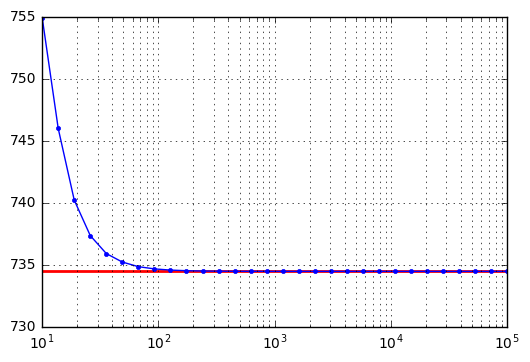

In [32]:
# plot
%matplotlib inline
fig, ax = plt.subplots(1,1)

tests = np.logspace(1,5,num=30)
align = lambda n: np.linspace(0,3,num=n)

ax.axhline(y=734.475, color='r', lw=2)
ax.semilogx(tests, [cumtrapz(fp(align(n)), align(n))[-1] for n in tests], '.-b')
plt.grid(which='both')